# MAE 269: HW3

In [2]:
import numpy as np
from numpy import sqrt
import sympy as sp
import scipy as sci
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
from scipy.integrate import solve_ivp

# 1. Simulating Dynamical Systems

## Defining Symbolic Functions

In [3]:
x1, x2 = sp.symbols('x_1 x_2')
g, l, q, w, mu, k, ep, = sp.symbols('g,l,q,w,mu,k,epsilon')
f1 = sp.Matrix([x2, -g*l*sp.sin(x1)+q])
f2 = sp.Matrix([x2, -k*x1 + mu*(1-x1**2)*x2])
f3 = sp.Matrix([(mu-(x1**2+x2**2))*x1+w*x2,(mu-(x1**2+x2**2))*x2+w*x1])
f4 = sp.Matrix([x2, -2*ep*x2-x1])

In [4]:
f1

Matrix([
[              x_2],
[-g*l*sin(x_1) + q]])

In [5]:
f2

Matrix([
[                         x_2],
[-k*x_1 + mu*x_2*(1 - x_1**2)]])

In [6]:
f3

Matrix([
[w*x_2 + x_1*(mu - x_1**2 - x_2**2)],
[w*x_1 + x_2*(mu - x_1**2 - x_2**2)]])

In [7]:
f4

Matrix([
[                 x_2],
[-2*epsilon*x_2 - x_1]])

## Fixed Points

In [8]:
p1 = list(sp.solve(f1,(x1,x2),set=True)[1])
p2 = list(sp.solve(f2,(x1,x2),set=True)[1])
p3 = list(sp.solve(f3,(x1,x2),set=True)[1])
p4 = list(sp.solve(f4,(x1,x2),set=True)[1])

In [9]:
p1

[(asin(q/(g*l)), 0), (pi - asin(q/(g*l)), 0)]

In [10]:
p2

[(0, 0)]

In [11]:
p3

[(0, 0),
 (sqrt(2*mu + 2*w)/2, sqrt(mu/2 + w/2)),
 (-sqrt(2*mu - 2*w)/2, sqrt(mu/2 - w/2)),
 (sqrt(2*mu - 2*w)/2, -sqrt(mu/2 - w/2)),
 (-sqrt(2*mu + 2*w)/2, -sqrt(mu/2 + w/2))]

In [12]:
p4

[(0, 0)]

## Function Parameters

In [67]:
# Pendulum
q_val = [0, 3.5, 7]
g_val = 9.81;
l_val = 1;

# Van Der Pol
k_val = 2;
mu1_val = [-1,1]

# Hopf
w_val = 1;
mu2_val = 1;

# Switch-Forced
eps_val = 0.2

## Fixed Point Behavior

### Pendulum

In [14]:
i = 1
print("Torque: q =",end=" ")
print(q_val[0])
print("1:",end=" ")
print(f1.jacobian((x1,x2)).subs([(x1,p1[0][0]),(x2,p1[0][1]),(g,g_val),(l,l_val),(q,q_val[i])]).evalf().eigenvals())
print("2:",end = " ")
print(f1.jacobian((x1,x2)).subs([(x1,p1[1][0]),(x2,p1[1][1]),(g,g_val),(l,l_val),(q,q_val[i])]).evalf().eigenvals())

Torque: q = 0
1: {-3.02727485560365*I: 1, 3.02727485560365*I: 1}
2: {-3.02727485560365: 1, 3.02727485560365: 1}


In [15]:
i = 1
print("Torque: q =",end=" ")
print(q_val[i])
print("1:",end=" ")
print(f1.jacobian((x1,x2)).subs([(x1,p1[0][0]),(x2,p1[0][1]),(g,g_val),(l,l_val),(q,q_val[i])]).evalf().eigenvals())
print("2:",end = " ")
print(f1.jacobian((x1,x2)).subs([(x1,p1[1][0]),(x2,p1[1][1]),(g,g_val),(l,l_val),(q,q_val[i])]).evalf().eigenvals())


Torque: q = 3.5
1: {-3.02727485560365*I: 1, 3.02727485560365*I: 1}
2: {-3.02727485560365: 1, 3.02727485560365: 1}


In [16]:
i = 2
print("Torque: q =",end=" ")
print(q_val[i])
print("1:",end=" ")
print(f1.jacobian((x1,x2)).subs([(x1,p1[0][0]),(x2,p1[0][1]),(g,g_val),(l,l_val),(q,q_val[i])]).evalf().eigenvals())
print("2:",end = " ")
print(f1.jacobian((x1,x2)).subs([(x1,p1[1][0]),(x2,p1[1][1]),(g,g_val),(l,l_val),(q,q_val[i])]).evalf().eigenvals())

Torque: q = 7
1: {-2.62161255563031*I: 1, 2.62161255563031*I: 1}
2: {-2.62161255563031: 1, 2.62161255563031: 1}


### Van der Pol

In [17]:
i = 0
print("Damping: mu =",end=" ")
print(mu1_val[i])
print("1:",end=" ")
print(f2.jacobian((x1,x2)).subs([(x1,p2[0][0]),(x2,p2[0][1]),(mu,mu1_val[i]),(k,k_val)]).evalf().eigenvals())

Damping: mu = -1
1: {-0.5 - 1.3228756555323*I: 1, -0.5 + 1.3228756555323*I: 1}


In [18]:
i = 1
print("Damping: mu =",end=" ")
print(mu1_val[i])
print("1:",end=" ")
print(f2.jacobian((x1,x2)).subs([(x1,p2[0][0]),(x2,p2[0][1]),(mu,mu1_val[i]),(k,k_val)]).evalf().eigenvals())

Damping: mu = 1
1: {0.5 - 1.3228756555323*I: 1, 0.5 + 1.3228756555323*I: 1}


### Hopf 

In [19]:
print("1:",end=" ") 
print(f3.jacobian((x1,x2)).subs([(x1,p3[0][0]),(x2,p3[0][1]),(w,w_val),(mu,mu2_val)]).evalf().eigenvals())

1: {0: 1, 2.00000000000000: 1}


### Switch-Forced 

In [20]:
print("1:",end=" ") 
print(f4.jacobian((x1,x2)).subs([(x1,p4[0][0]),(x2,p4[0][1]),(ep,eps_val)]).evalf().eigenvals())

1: {-0.2 - 0.979795897113271*I: 1, -0.2 + 0.979795897113271*I: 1}


## Defining Numerical Functions

In [21]:
def pendulum(t,x,arg):
    x1, x2 = x;
    g, l, q, = arg;
    return np.array([x2, -g*l*np.sin(x1)+q])

def VanDerPol(t,x,arg):
    x1, x2 = x;
    k, mu = arg;
    return np.array([x2, -k*x1 + mu*(1-np.power(x1,2))*x2])

def Hopf(t,x,arg):
    x1, x2 = x;
    w, mu = arg;
    return np.array([(mu-(np.power(x1,2)+np.power(x2,2)))*x1+w*x2,(mu-(np.power(x1,2)+np.power(x2,2)))*x2-w*x1])

def sfo(t,x,arg):
    x1, x2 = x;
    F = ((x1<=0)*2-1)*10
    eps = arg;
    return np.array([x2, F-2*eps*x2-x1])

## Simluation and Plotting

In [22]:
#%matplotlib qt

### Simulation Domain

In [23]:
t = np.linspace(0,10,100);

### Vector Feild and Trajectory Plotter

In [333]:

def plot_system(f,arg,T,xmin,xmax,ymin,ymax,t,fig):
    x = np.linspace(xmin,xmax,50)
    y = np.linspace(ymin,ymax,50);
    X, Y = np.meshgrid(x,y)
    XY = [X, Y]

    UV = f(t,XY,arg)
    U, V = UV
    mag = sqrt(np.power(U,2) + np.power(V,2))
    Uhat = np.divide(U, mag, out=np.zeros_like(U),where=mag!=0)
    Vhat = np.divide(V, mag, out=np.zeros_like(U),where=mag!=0)

    h = 0.01 # step size (1 ms)
    tf = 10 # duration (1 s)
    N = int(tf/h);

    s1 = solve_ivp(f, [0, 10],T[0], args=[arg], t_eval=t).y
    s2 = solve_ivp(f, [0, 10],T[1], args=[arg], t_eval=t).y
    s3 = solve_ivp(f, [0, 10],T[2], args=[arg], t_eval=t).y

    gs0 = gridspec.GridSpec(1, 1, figure=fig)

    gs00 = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs0[0])

    ax1 = fig.add_subplot(gs00[:, :-1])
    ax2 = fig.add_subplot(gs00[-0, -1])
    ax3 = fig.add_subplot(gs00[-1, -1])
    #fig.tight_layout(pad=1)

    ax1.quiver(X,Y,Uhat,Vhat)
    ax1.plot(s1[0,:],s1[1,:])
    ax1.plot(s2[0,:],s2[1,:])
    ax1.plot(s3[0,:],s3[1,:])
    ax1.set_xlim([xmin,xmax])
    ax1.set_ylim([ymin,ymax])
    ax2.plot(t,s1[0])
    ax2.plot(t,s2[0])
    ax2.plot(t,s3[0])
    ax3.plot(t,s1[1])
    ax3.plot(t,s2[1])
    ax3.plot(t,s3[1])
    return [ax1, ax2, ax3]

## Pendulum

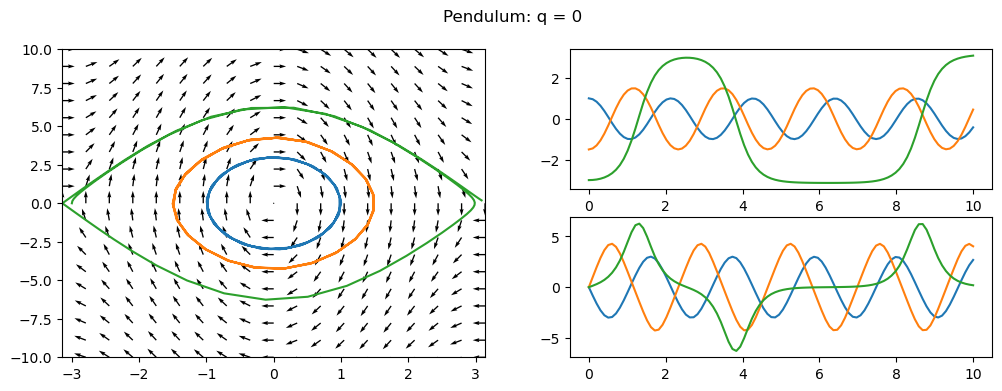

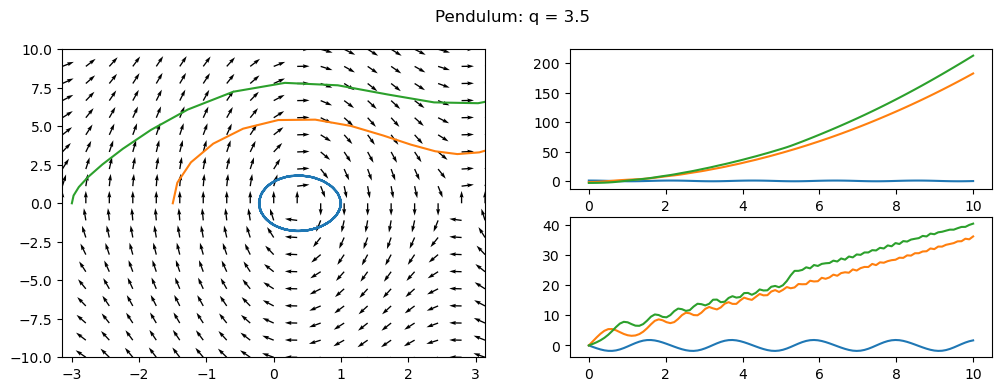

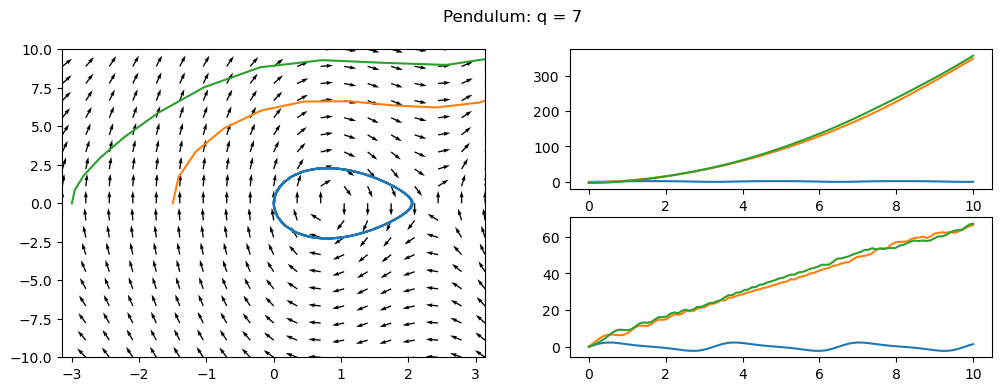

In [158]:
t1 = np.linspace(0,10,100);

fig1 = plt.figure(figsize=(12,4))
plot_system(pendulum,[g_val,l_val,q_val[0]],[[1,0],[-1.5,0],[-3,0]],-np.pi,np.pi,-10,10,t1,fig1);
fig1.suptitle('Pendulum: q = 0');

fig2 = plt.figure(figsize=(12,4))
plot_system(pendulum,[g_val,l_val,q_val[1]],[[1,0],[-1.5,0],[-3,0]],-np.pi,np.pi,-10,10,t1,fig2);
fig2.suptitle('Pendulum: q = 3.5');


fig3 = plt.figure(figsize=(12,4))
plot_system(pendulum,[g_val,l_val,q_val[2]],[[0,0],[-1.5,0],[-3,0]],-np.pi,np.pi,-10,10,t1,fig3);
fig3.suptitle('Pendulum: q = 7');


## Van der Pol

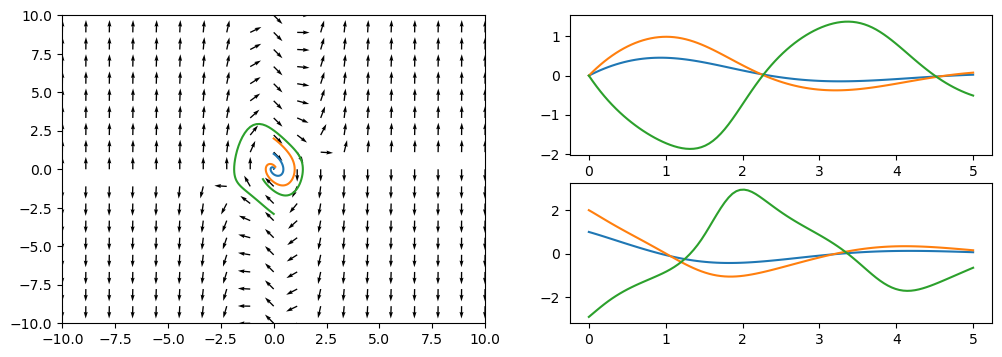

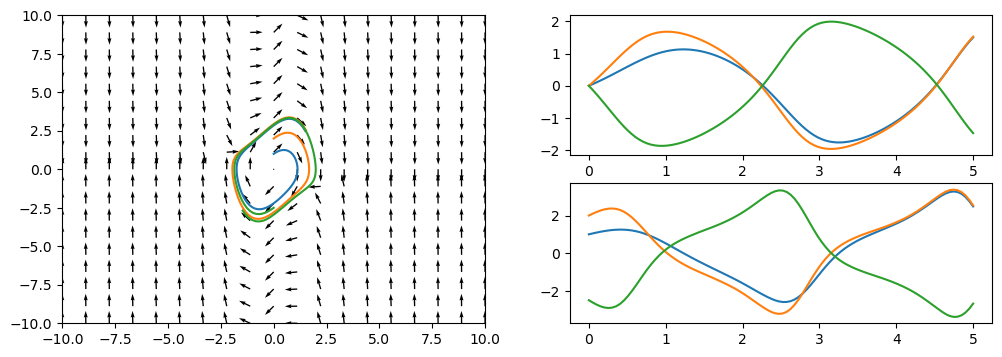

In [159]:
t2 = np.linspace(0,5,100);

fig4 = plt.figure(figsize=(12,4))
plot_system(VanDerPol,[k_val,mu1_val[0]],[[0,1],[0,2],[0,-2.9]],-10,10,-10,10,t2,fig4);

fig5 = plt.figure(figsize=(12,4))
plot_system(VanDerPol,[k_val,mu1_val[1]],[[0,1],[0,2],[0,-2.5]],-10,10,-10,10,t2,fig5);

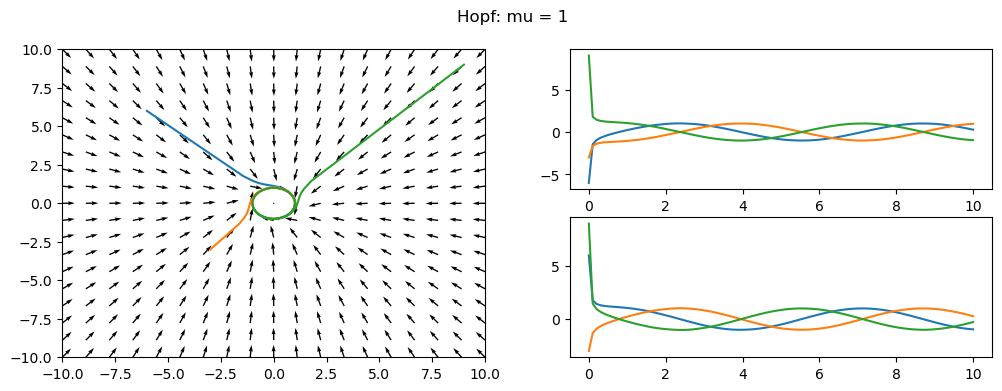

In [160]:
t3 = np.linspace(0,10,100);

fig6 = plt.figure(figsize=(12,4))
plot_system(Hopf,arg3_val,[[-6,6],[-3,-3],[9,9]],-10,10,-10,10,t3,fig6);
fig6.suptitle('Hopf: mu = 1');


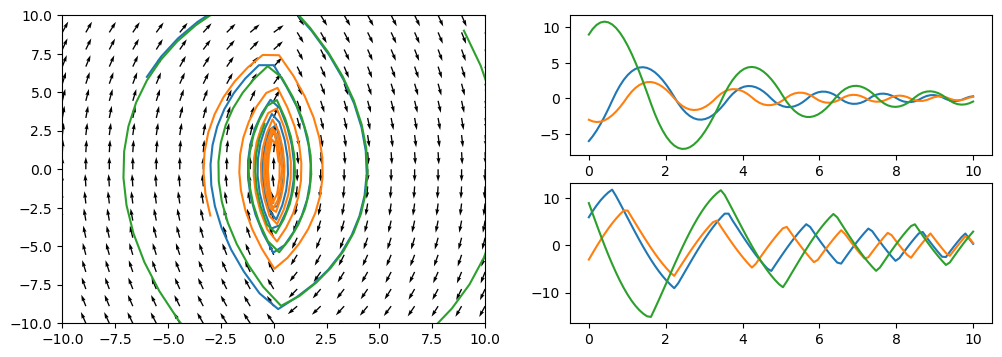

In [161]:
t4 = np.linspace(0,10,100);

fig7 = plt.figure(figsize=(12,4))
plot_system(sfo,arg4_val,[[-6,6],[-3,-3],[9,9]],-10,10,-10,10,t3,fig7);

# 2. Stability of Torque-Free Rotating Body

In [162]:
def cross_matrix(v):
    vx = v[0]
    vy = v[1]
    vz = v[2]

    return np.array([[0,-vz,vy],
                     [vz,0,-vx,],
                     [-vy,vx,0]]);

In [163]:
# (1)
t = sp.symbols('t')
# wx,wy,wz=sp.symbols('omega_x(t),omega_y(t),omega_z(t)')
wx = sp.Function('omega_x', real=True)(t)
wy = sp.Function('omega_y', real=True)(t)
wz = sp.Function('omega_z', real=True)(t)

lx,ly,lz=sp.symbols('lambda_x(t),lambda_y(t),lambda_z(t)')

w = sp.Matrix([[wx,wy,wz]]).transpose()
w

Matrix([
[omega_x(t)],
[omega_y(t)],
[omega_z(t)]])

In [164]:
# (2)
IB = sp.Matrix([[lx,0,0],[0,ly,0],[0,0,lz]])
IB

Matrix([
[lambda_x(t),           0,           0],
[          0, lambda_y(t),           0],
[          0,           0, lambda_z(t)]])

In [165]:
# (3)
G = -(IB).inv() @ (cross_matrix(w) @ IB @ w)
G

Matrix([
[-(-lambda_y(t)*omega_y(t)*omega_z(t) + lambda_z(t)*omega_y(t)*omega_z(t))/lambda_x(t)],
[ -(lambda_x(t)*omega_x(t)*omega_z(t) - lambda_z(t)*omega_x(t)*omega_z(t))/lambda_y(t)],
[-(-lambda_x(t)*omega_x(t)*omega_y(t) + lambda_y(t)*omega_x(t)*omega_y(t))/lambda_z(t)]])

In [166]:
# (4)
p = sp.solve(G,(wx,wy,wz))
p

[(0, 0, omega_z(t)), (0, omega_y(t), 0), (omega_x(t), 0, 0)]

In [167]:
# (5)
A1 = G.jacobian((wx,wy,wz)).subs([(wx,p[2][0]),(wy,p[2][1]),(wz,p[2][2])])
A2 = G.jacobian((wx,wy,wz)).subs([(wx,p[1][0]),(wy,p[1][1]),(wz,p[1][2])])
A3 = G.jacobian((wx,wy,wz)).subs([(wx,p[0][0]),(wy,p[0][1]),(wz,p[0][2])])

In [327]:
# (6)
eig1 = A1.eigenvals()
eig2 = A2.eigenvals()
eig3 = A3.eigenvals()
display(sp.simplify(eig1))
display(sp.simplify(eig2))
display(sp.simplify(eig3))

{0: 1, -sqrt(-(lambda_x(t) - lambda_y(t))*(lambda_x(t) - lambda_z(t))/(lambda_y(t)*lambda_z(t)))*omega_x(t): 1, sqrt(-(lambda_x(t) - lambda_y(t))*(lambda_x(t) - lambda_z(t))/(lambda_y(t)*lambda_z(t)))*omega_x(t): 1}

{0: 1, -sqrt((lambda_x(t) - lambda_y(t))*(lambda_y(t) - lambda_z(t))/(lambda_x(t)*lambda_z(t)))*omega_y(t): 1, sqrt((lambda_x(t) - lambda_y(t))*(lambda_y(t) - lambda_z(t))/(lambda_x(t)*lambda_z(t)))*omega_y(t): 1}

{0: 1, -sqrt(-(lambda_x(t) - lambda_z(t))*(lambda_y(t) - lambda_z(t))/(lambda_x(t)*lambda_y(t)))*omega_z(t): 1, sqrt(-(lambda_x(t) - lambda_z(t))*(lambda_y(t) - lambda_z(t))/(lambda_x(t)*lambda_y(t)))*omega_z(t): 1}

In [169]:
# (7)
eig1 = A1.subs([(wx,1),(wy,1),(wz,1),(lx,3),(ly,2),(lz,1)]).evalf().eigenvals()
eig2 = A2.subs([(wx,1),(wy,1),(wz,1),(lx,3),(ly,2),(lz,1)]).evalf().eigenvals()
eig3 = A3.subs([(wx,1),(wy,1),(wz,1),(lx,3),(ly,2),(lz,1)]).evalf().eigenvals()

print("x:",end=" ")
print(eig1)
print("    -> Focus")
print()

print("y:",end=" ")
print(eig2)
print("    -> Saddle")
print()

print("z:",end=" ")
print(eig3)
print("    -> Focus")
print()

x: {0: 1, -1.0*I: 1, 1.0*I: 1}
    -> Focus

y: {0: 1, -0.577350269189626: 1, 0.577350269189626: 1}
    -> Saddle

z: {-0.577350269189626*I: 1, 0.577350269189626*I: 1, 0: 1}
    -> Focus



# 3. Phugoid Instability

In [349]:
# (1)
theta, v, u, R = sp.symbols('theta, v, u, R')

sym_phug = sp.Matrix([[-sp.sin(theta)-R*v**2 + u],[(v**2-sp.cos(theta))/v]])

def num_phug(t,x,arg):
    theta, v, = x;
    R, u, = arg
    return np.array([(np.power(v,2)-np.cos(theta)),-np.sin(theta)-R*np.power(v,2) + u])


p = sp.solve(sym_phug,(theta,v))


In [350]:
# Fixed Points
display(sp.simplify(p[0]))
display(sp.simplify(p[1]))
display(sp.simplify(p[2]))
display(sp.simplify(p[3]))

(-2*atan((sqrt(R**2 - u**2 + 1) - 1)/(R + u)), -sqrt(cos(2*atan((sqrt(R**2 - u**2 + 1) - 1)/(R + u)))))

(-2*atan((sqrt(R**2 - u**2 + 1) - 1)/(R + u)), sqrt(cos(2*atan((sqrt(R**2 - u**2 + 1) - 1)/(R + u)))))

(2*atan((sqrt(R**2 - u**2 + 1) + 1)/(R + u)), -sqrt(cos(2*atan((sqrt(R**2 - u**2 + 1) + 1)/(R + u)))))

(2*atan((sqrt(R**2 - u**2 + 1) + 1)/(R + u)), sqrt(cos(2*atan((sqrt(R**2 - u**2 + 1) + 1)/(R + u)))))

In [ ]:
sp.solve(p[0]-p[1],()

In [351]:
# Jacobian
jac = sp.simplify(sym_phug.jacobian((theta,v)))

In [389]:
jac1 = jac.subs((theta),(v))
eig1 = list(jac.subs([(theta,p[0][0]),(v,p[0][1])]).eigenvals())
eig2 = list(jac.subs([(theta,p[1][0]),(v,p[1][1])]).eigenvals())
eig3 = list(jac.subs([(theta,p[2][0]),(v,p[2][1])]).eigenvals())
eig4 = list(jac.subs([(theta,p[3][0]),(v,p[3][1])]).eigenvals())
display(eig1)
display(eig2)
display(eig3)
display(eig4)

[-sqrt(8*(R**2 + R*u - sqrt(R**2 - u**2 + 1) + 1)*(R**2*sqrt(R**2 - u**2 + 1) - R**2 + R*u*sqrt(R**2 - u**2 + 1) + u**2 + sqrt(R**2 - u**2 + 1) - 1) + (-2*R**2 + R**2*(R*u + u**2 + sqrt(R**2 - u**2 + 1) - 1)/(R**2 + R*u - sqrt(R**2 - u**2 + 1) + 1) - 2*R*u + R*u*(R*u + u**2 + sqrt(R**2 - u**2 + 1) - 1)/(R**2 + R*u - sqrt(R**2 - u**2 + 1) + 1) + 2*sqrt(R**2 - u**2 + 1) - sqrt(R**2 - u**2 + 1)*(R*u + u**2 + sqrt(R**2 - u**2 + 1) - 1)/(R**2 + R*u - sqrt(R**2 - u**2 + 1) + 1) - 2 + (R*u + u**2 + sqrt(R**2 - u**2 + 1) - 1)/(R**2 + R*u - sqrt(R**2 - u**2 + 1) + 1))**2)/(2*(R**2 + R*u - sqrt(R**2 - u**2 + 1) + 1)) + 1 - (R*u + u**2 + sqrt(R**2 - u**2 + 1) - 1)/(2*(R**2 + R*u - sqrt(R**2 - u**2 + 1) + 1)),
 sqrt(8*(R**2 + R*u - sqrt(R**2 - u**2 + 1) + 1)*(R**2*sqrt(R**2 - u**2 + 1) - R**2 + R*u*sqrt(R**2 - u**2 + 1) + u**2 + sqrt(R**2 - u**2 + 1) - 1) + (-2*R**2 + R**2*(R*u + u**2 + sqrt(R**2 - u**2 + 1) - 1)/(R**2 + R*u - sqrt(R**2 - u**2 + 1) + 1) - 2*R*u + R*u*(R*u + u**2 + sqrt(R**2 - u**2

[-sqrt(8*(R**2 + R*u - sqrt(R**2 - u**2 + 1) + 1)*(R**2*sqrt(R**2 - u**2 + 1) - R**2 + R*u*sqrt(R**2 - u**2 + 1) + u**2 + sqrt(R**2 - u**2 + 1) - 1) + (-2*R**2 + R**2*(R*u + u**2 + sqrt(R**2 - u**2 + 1) - 1)/(R**2 + R*u - sqrt(R**2 - u**2 + 1) + 1) - 2*R*u + R*u*(R*u + u**2 + sqrt(R**2 - u**2 + 1) - 1)/(R**2 + R*u - sqrt(R**2 - u**2 + 1) + 1) + 2*sqrt(R**2 - u**2 + 1) - sqrt(R**2 - u**2 + 1)*(R*u + u**2 + sqrt(R**2 - u**2 + 1) - 1)/(R**2 + R*u - sqrt(R**2 - u**2 + 1) + 1) - 2 + (R*u + u**2 + sqrt(R**2 - u**2 + 1) - 1)/(R**2 + R*u - sqrt(R**2 - u**2 + 1) + 1))**2)/(2*(R**2 + R*u - sqrt(R**2 - u**2 + 1) + 1)) + 1 - (R*u + u**2 + sqrt(R**2 - u**2 + 1) - 1)/(2*(R**2 + R*u - sqrt(R**2 - u**2 + 1) + 1)),
 sqrt(8*(R**2 + R*u - sqrt(R**2 - u**2 + 1) + 1)*(R**2*sqrt(R**2 - u**2 + 1) - R**2 + R*u*sqrt(R**2 - u**2 + 1) + u**2 + sqrt(R**2 - u**2 + 1) - 1) + (-2*R**2 + R**2*(R*u + u**2 + sqrt(R**2 - u**2 + 1) - 1)/(R**2 + R*u - sqrt(R**2 - u**2 + 1) + 1) - 2*R*u + R*u*(R*u + u**2 + sqrt(R**2 - u**2

[-sqrt(-8*(R**2 + R*u + sqrt(R**2 - u**2 + 1) + 1)*(R**2*sqrt(R**2 - u**2 + 1) + R**2 + R*u*sqrt(R**2 - u**2 + 1) - u**2 + sqrt(R**2 - u**2 + 1) + 1) + (2*R**2 - R**2*(R*u + u**2 - sqrt(R**2 - u**2 + 1) - 1)/(R**2 + R*u + sqrt(R**2 - u**2 + 1) + 1) + 2*R*u - R*u*(R*u + u**2 - sqrt(R**2 - u**2 + 1) - 1)/(R**2 + R*u + sqrt(R**2 - u**2 + 1) + 1) + 2*sqrt(R**2 - u**2 + 1) - sqrt(R**2 - u**2 + 1)*(R*u + u**2 - sqrt(R**2 - u**2 + 1) - 1)/(R**2 + R*u + sqrt(R**2 - u**2 + 1) + 1) + 2 - (R*u + u**2 - sqrt(R**2 - u**2 + 1) - 1)/(R**2 + R*u + sqrt(R**2 - u**2 + 1) + 1))**2)/(2*(R**2 + R*u + sqrt(R**2 - u**2 + 1) + 1)) + 1 - (R*u + u**2 - sqrt(R**2 - u**2 + 1) - 1)/(2*(R**2 + R*u + sqrt(R**2 - u**2 + 1) + 1)),
 sqrt(-8*(R**2 + R*u + sqrt(R**2 - u**2 + 1) + 1)*(R**2*sqrt(R**2 - u**2 + 1) + R**2 + R*u*sqrt(R**2 - u**2 + 1) - u**2 + sqrt(R**2 - u**2 + 1) + 1) + (2*R**2 - R**2*(R*u + u**2 - sqrt(R**2 - u**2 + 1) - 1)/(R**2 + R*u + sqrt(R**2 - u**2 + 1) + 1) + 2*R*u - R*u*(R*u + u**2 - sqrt(R**2 - u**2

[-sqrt(-8*(R**2 + R*u + sqrt(R**2 - u**2 + 1) + 1)*(R**2*sqrt(R**2 - u**2 + 1) + R**2 + R*u*sqrt(R**2 - u**2 + 1) - u**2 + sqrt(R**2 - u**2 + 1) + 1) + (2*R**2 - R**2*(R*u + u**2 - sqrt(R**2 - u**2 + 1) - 1)/(R**2 + R*u + sqrt(R**2 - u**2 + 1) + 1) + 2*R*u - R*u*(R*u + u**2 - sqrt(R**2 - u**2 + 1) - 1)/(R**2 + R*u + sqrt(R**2 - u**2 + 1) + 1) + 2*sqrt(R**2 - u**2 + 1) - sqrt(R**2 - u**2 + 1)*(R*u + u**2 - sqrt(R**2 - u**2 + 1) - 1)/(R**2 + R*u + sqrt(R**2 - u**2 + 1) + 1) + 2 - (R*u + u**2 - sqrt(R**2 - u**2 + 1) - 1)/(R**2 + R*u + sqrt(R**2 - u**2 + 1) + 1))**2)/(2*(R**2 + R*u + sqrt(R**2 - u**2 + 1) + 1)) + 1 - (R*u + u**2 - sqrt(R**2 - u**2 + 1) - 1)/(2*(R**2 + R*u + sqrt(R**2 - u**2 + 1) + 1)),
 sqrt(-8*(R**2 + R*u + sqrt(R**2 - u**2 + 1) + 1)*(R**2*sqrt(R**2 - u**2 + 1) + R**2 + R*u*sqrt(R**2 - u**2 + 1) - u**2 + sqrt(R**2 - u**2 + 1) + 1) + (2*R**2 - R**2*(R*u + u**2 - sqrt(R**2 - u**2 + 1) - 1)/(R**2 + R*u + sqrt(R**2 - u**2 + 1) + 1) + 2*R*u - R*u*(R*u + u**2 - sqrt(R**2 - u**2

In [380]:
# Equal Drag and Thrust
u_subs = R
R_subs = 1

e1 = [eig1[0].subs([(u,u_subs),(R,R_subs)]).evalf(),eig1[1].subs([(u,u_subs),(R,R_subs)]).evalf()]
e2 = [eig2[0].subs([(u,u_subs),(R,R_subs)]).evalf(),eig2[1].subs([(u,u_subs),(R,R_subs)]).evalf()]
e3 = [eig3[0].subs([(u,u_subs),(R,R_subs)]).evalf(),eig3[1].subs([(u,u_subs),(R,R_subs)]).evalf()]
e4 = [eig1[0].subs([(u,u_subs),(R,R_subs)]).evalf(),eig4[1].subs([(u,u_subs),(R,R_subs)]).evalf()]

print("Fixed Points:",end='')
print(len(p1))
print("1:",end=" ")
print(p[0].subs([(u,u_subs),(R,R_subs)]))
print("2:",end=" ")
print(p[1].subs([(u,u_subs),(R,R_subs)]))
print("3:",end=" ")
print(p[2].subs([(u,u_subs),(R,R_subs)]))
print("4:",end=" ")
print(p[3].subs([(u,u_subs),(R,R_subs)]))
print()

print("Stability:")
print("1:",end=" ")
print(e1)
print("    -> Saddle")
print()

print("2:",end=" ")
print(e2)
print("    -> Saddle")
print()

print("3:",end=" ")
print(e3)
print("    -> Saddle")
print()

print("4:",end=" ")
print(e4)
print("    -> Saddle")
print()


Fixed Points:2
1: 

AttributeError: 'list' object has no attribute 'subs'

In [372]:
# Thrust is 0
u_subs = 0
R_subs = 1

e1 = [eig1[0].subs([(u,u_subs),(R,R_subs)]).evalf(),eig1[1].subs([(u,u_subs),(R,R_subs)]).evalf()]
e2 = [eig2[0].subs([(u,u_subs),(R,R_subs)]).evalf(),eig2[1].subs([(u,u_subs),(R,R_subs)]).evalf()]
e3 = [eig3[0].subs([(u,u_subs),(R,R_subs)]).evalf(),eig3[1].subs([(u,u_subs),(R,R_subs)]).evalf()]
e4 = [eig1[0].subs([(u,u_subs),(R,R_subs)]).evalf(),eig4[1].subs([(u,u_subs),(R,R_subs)]).evalf()]

print("Fixed Points:",end='')
print(len(p1))
print("1:",end=" ")
print(p1[0])
print("2:",end=" ")
print(p1[1])
print()

print("Stability:")
print("1:",end=" ")
print(e1)
print("    -> Saddle")
print()

print("2:",end=" ")
print(e2)
print("    -> Saddle")
print()


Fixed Points:2
1: (0, -1)
2: (0, 1)

Stability:
1: [-1.15530818621882, 2.44820140503227]
    -> Saddle

2: [-1.15530818621882, 2.44820140503227]
    -> Saddle



In [383]:
# Thrust Greater than drag
u_subs = 2
R_subs = 1

e1 = [eig1[0].subs([(u,u_subs),(R,R_subs)]).evalf(),eig1[1].subs([(u,u_subs),(R,R_subs)]).evalf()]
e2 = [eig2[0].subs([(u,u_subs),(R,R_subs)]).evalf(),eig2[1].subs([(u,u_subs),(R,R_subs)]).evalf()]
e3 = [eig3[0].subs([(u,u_subs),(R,R_subs)]).evalf(),eig3[1].subs([(u,u_subs),(R,R_subs)]).evalf()]
e4 = [eig1[0].subs([(u,u_subs),(R,R_subs)]).evalf(),eig4[1].subs([(u,u_subs),(R,R_subs)]).evalf()]

print("Fixed Points:",end='')
print(len(p1))
print("1:",end=" ")
print(p[0])
print("2:",end=" ")
print(p[1])
print("3:",end=" ")
print(p[2])
print("4:",end=" ")
print(p[3])
print()

print("Stability:")
print("1:",end=" ")
print(e1)
print("    -> ?")
print()

print("2:",end=" ")
print(e2)
print("    -> ?")
print()

print("3:",end=" ")
print(e3)
print("    -> ?")
print()

print("4:",end=" ")
print(e4)
print("    -> ?")
print()


Fixed Points:2
1: (-2*atan((sqrt(R**2 - u**2 + 1) - 1)/(R + u)), -sqrt(cos(2*atan((sqrt(R**2 - u**2 + 1) - 1)/(R + u)))))
2: (-2*atan((sqrt(R**2 - u**2 + 1) - 1)/(R + u)), sqrt(cos(2*atan((sqrt(R**2 - u**2 + 1) - 1)/(R + u)))))
3: (2*atan((sqrt(R**2 - u**2 + 1) + 1)/(R + u)), -sqrt(cos(2*atan((sqrt(R**2 - u**2 + 1) + 1)/(R + u)))))
4: (2*atan((sqrt(R**2 - u**2 + 1) + 1)/(R + u)), sqrt(cos(2*atan((sqrt(R**2 - u**2 + 1) + 1)/(R + u)))))

Stability:
1: [-0.64083926348103 - 1.43822579510071*I, 1.64083926348103 + 0.73111901391416*I]
    -> Saddle

2: [-0.64083926348103 - 1.43822579510071*I, 1.64083926348103 + 0.73111901391416*I]
    -> Saddle

3: [-0.64083926348103 + 1.43822579510071*I, 1.64083926348103 - 0.73111901391416*I]
    -> Saddle

4: [-0.64083926348103 - 1.43822579510071*I, 1.64083926348103 - 0.73111901391416*I]
    -> Saddle



In [310]:
# Thrust greater than drag
# Thrust Equal to Zero
u_subs = 1
R_subs = 0.1
jac3 = jac.subs([(u,u_subs),(R,R_subs)])
p3 = sp.solve(sym_phug.subs([(u,u_subs),(R,R_subs)]),(theta,v))
e1 = jac3.subs([(theta,p3[0][0]),(v,p3[1][1])]).evalf().eigenvals()
e2 = jac3.subs([(theta,p3[0][0]),(v,p3[1][1])]).evalf().eigenvals()
e3 = jac3.subs([(theta,p3[0][0]),(v,p3[1][1])]).evalf().eigenvals()
e4 = jac3.subs([(theta,p3[0][0]),(v,p3[1][1])]).evalf().eigenvals()
print("1:",end=" ")
print(e1)
print("    -> Saddle")
print()

print("2:",end=" ")
print(e2)
print("    -> Saddle")
print()

print("3:",end=" ")
print(e3)
print("    -> Saddle")
print()

print("4:",end=" ")
print(e4)
print("    -> Saddle")
print()

1: {-0.104884226397538: 1, 1.90686442441734: 1}
    -> Saddle

2: {-0.104884226397538: 1, 1.90686442441734: 1}
    -> Saddle

3: {-0.104884226397538: 1, 1.90686442441734: 1}
    -> Saddle

4: {-0.104884226397538: 1, 1.90686442441734: 1}
    -> Saddle



In [210]:
# Thrust less than drag
p4 = sp.solve(sym_phug.subs([(u,0.001),(R,1)]),(theta,v))
print("1:",end=" ")
print(p4[0])
print("    -> Stable Node")
print()

print("2:",end=" ")
print(p4[1])
print("    -> Saddle")
print()

1: (-0.784691056557336, -0.841193559420084)
    -> Stable Node

2: (-0.784691056557336, 0.841193559420084)
    -> Saddle



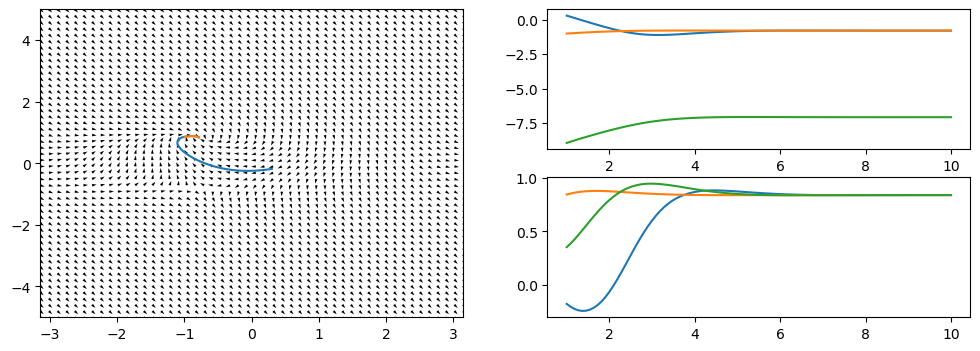

In [339]:
t = np.linspace(1,10,100)
fig = plt.figure(figsize=(12,4))

arg = [1, 0] 
T = [[1,0.5],[-1,0.5],[-10,0.5]]
plot_system(num_phug,arg,T,-np.pi,np.pi,-5,5,t,fig);

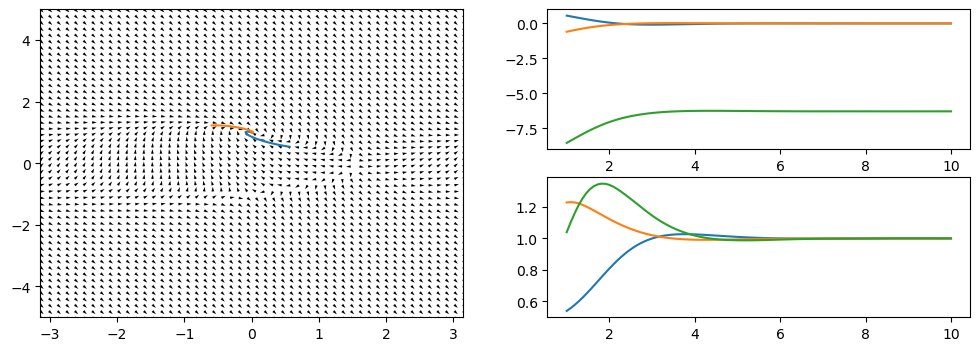

In [384]:
t = np.linspace(1,10,100)
fig = plt.figure(figsize=(12,4))

arg = [1, 1] 
T = [[1,0.5],[-1,0.5],[-10,0.5]]
plot_system(num_phug,arg,T,-np.pi,np.pi,-5,5,t,fig);

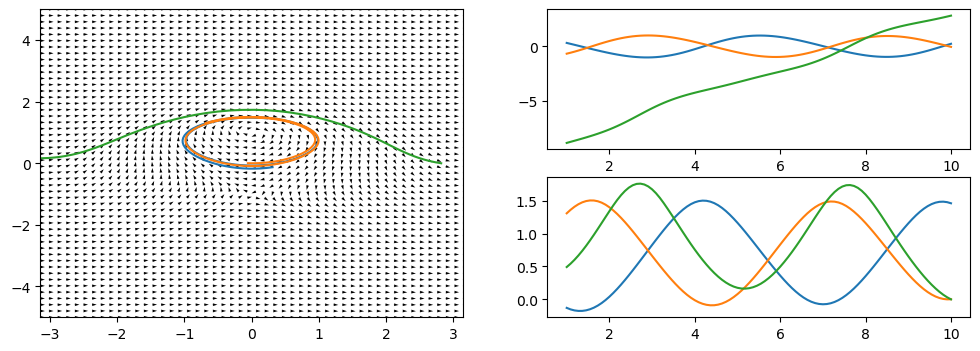

In [387]:
t = np.linspace(1,10,100)
fig = plt.figure(figsize=(12,4))

arg = [0.01, 0.01] 
T = [[1,0.5],[-1,0.5],[-10,0.5]]
plot_system(num_phug,arg,T,-np.pi,np.pi,-5,5,t,fig);